#PREGUNTA 5

#UNIV. CONDORI YUJRA MOISES MARTIN

5.      Sin el uso de librerías programe las penalizaciones l1 y l2, aplicando normalización.

Columna: golesloc
Penalización L1: 770.3333333332972
Penalización L2: 225.76543209877502

Columna: golesvis
Penalización L1: 747.6666666666347
Penalización L2: 214.6296296296376

Columna: golesesploc
Penalización L1: 955.2142857142811
Penalización L2: 257.6814285714279

Columna: golesespvis
Penalización L1: 933.4857142857097
Penalización L2: 246.87795918367257

Columna: poss
Penalización L1: 2426.390625
Penalización L2: 1421.417724609375



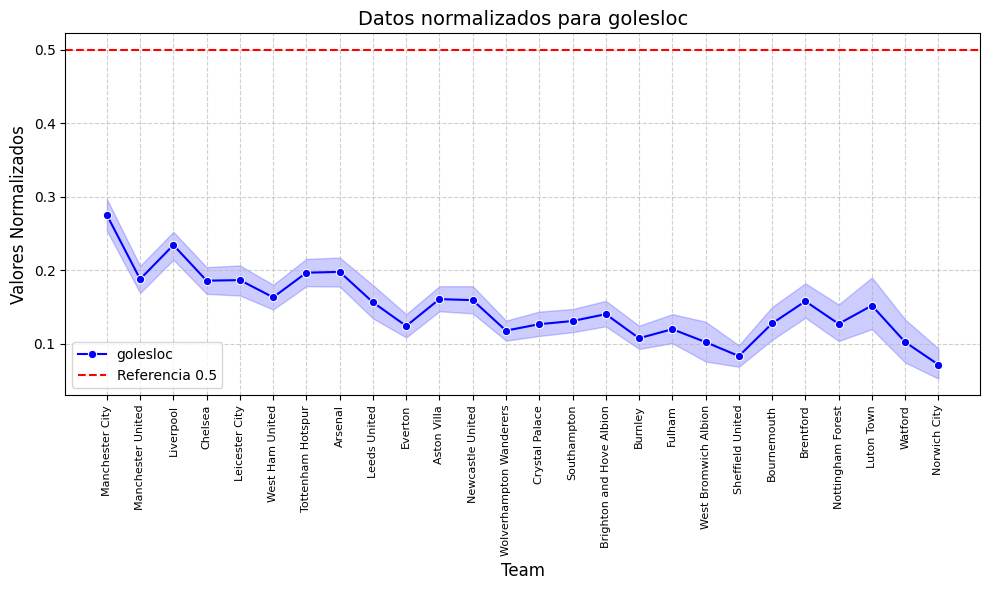

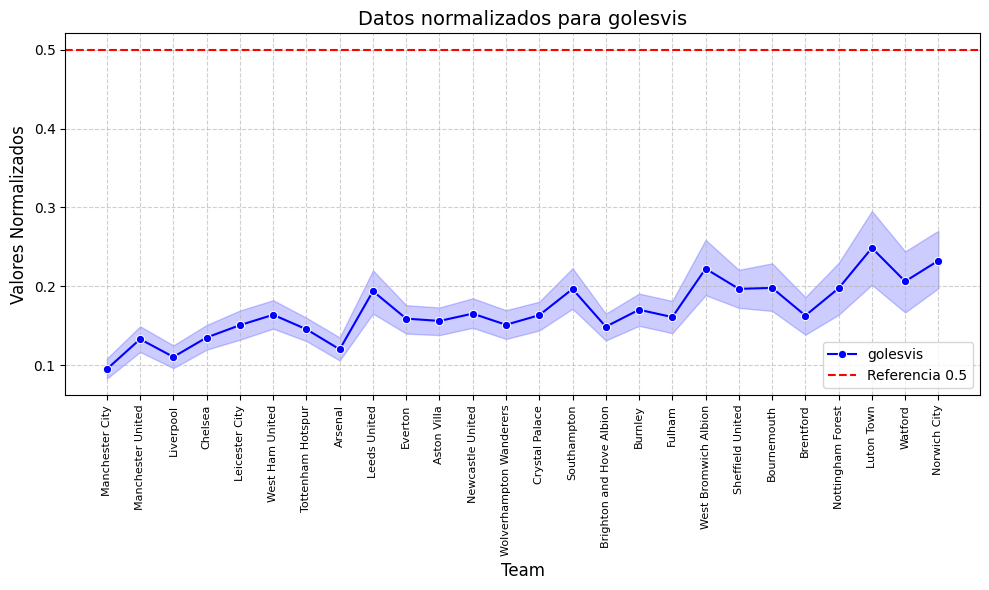

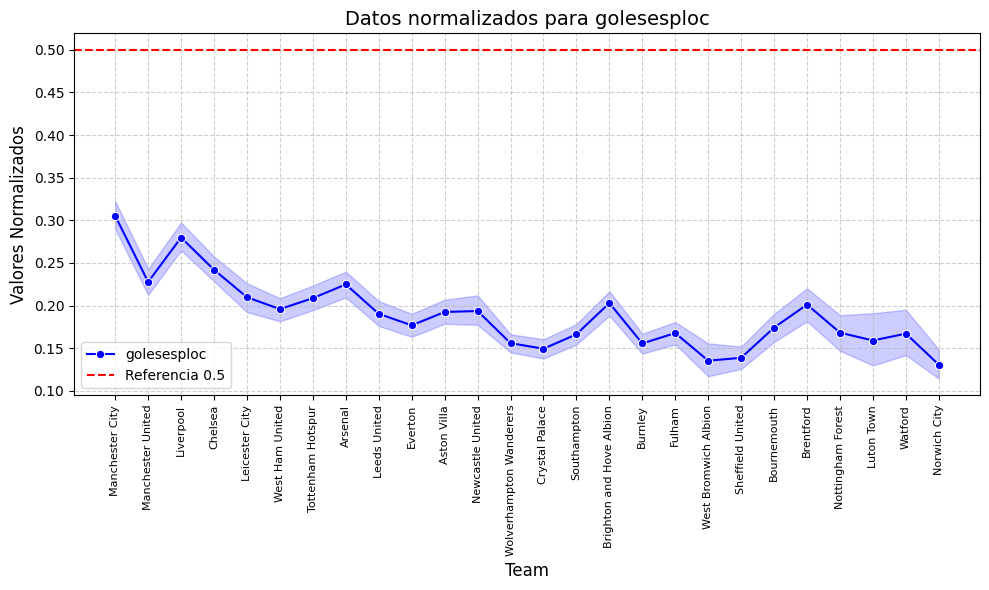

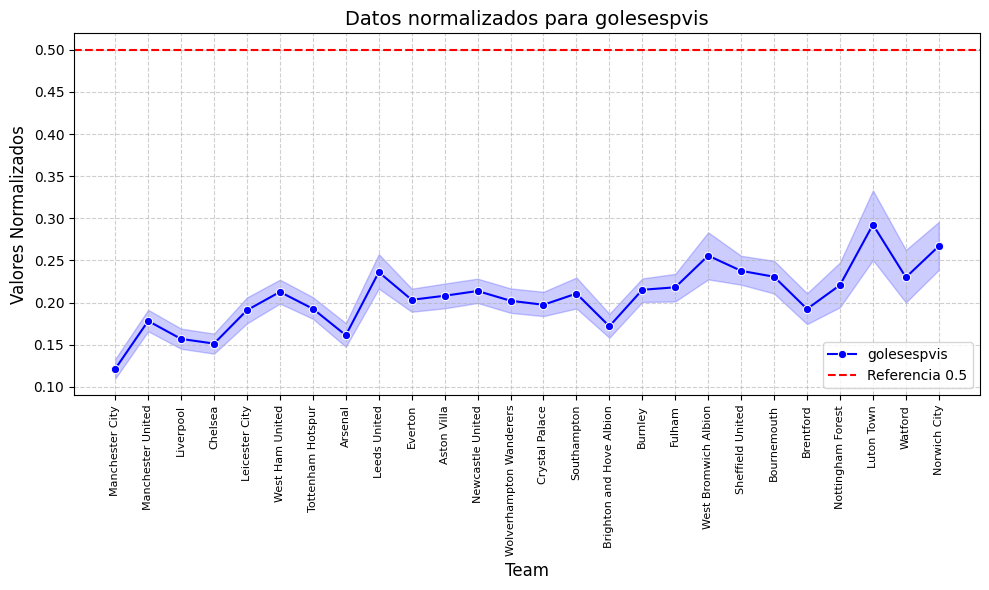

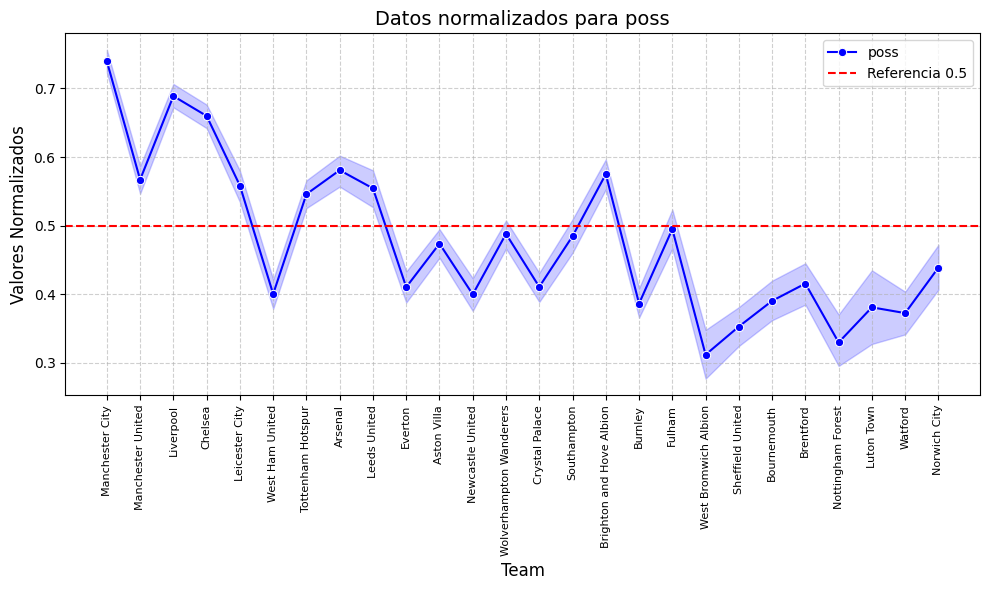

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
url = 'https://raw.githubusercontent.com/moisesmartincy/DAT245---INTELIGENCIA-ARTIFICIAL/refs/heads/main/DATASETS/matchesmod1.csv'
datos = pd.read_csv(url, encoding="unicode_escape", on_bad_lines='skip')

# Convertir a numpy para el procesamiento
dataset = datos.to_numpy()

# Función para normalizar el dataset
def normalizar_columnas(dataset):
    datos_normalizados = dataset.copy()
    for col in range(dataset.shape[1]):
        min_val = np.min(dataset[:, col])
        max_val = np.max(dataset[:, col])
        if max_val - min_val > 0:  # Evitar división por cero
            datos_normalizados[:, col] = (dataset[:, col] - min_val) / (max_val - min_val)
    return datos_normalizados

# Seleccionar columnas numéricas y normalizarlas
indices_numericos = ['golesloc', 'golesvis', 'golesesploc', 'golesespvis', 'poss']
indices_columnas = [datos.columns.get_loc(col) for col in indices_numericos]
dataset_numerico = dataset[:, indices_columnas]
datos_normalizados = normalizar_columnas(dataset_numerico)

# Función para penalizaciones L1 y L2
def penalizacion_L1(coeficientes):
    return np.sum(np.abs(coeficientes))

def penalizacion_L2(coeficientes):
    return np.sum(coeficientes**2)

# Aplicar penalizaciones L1 y L2
for i, col in enumerate(indices_numericos):
    l1_penalty = penalizacion_L1(datos_normalizados[:, i])
    l2_penalty = penalizacion_L2(datos_normalizados[:, i])
    print(f"Columna: {col}")
    print(f"Penalización L1: {l1_penalty}")
    print(f"Penalización L2: {l2_penalty}")
    print()

# Visualización mejorada de los datos normalizados
for i, col in enumerate(indices_numericos):
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=datos['team'], y=datos_normalizados[:, i], label=f'{col}', marker='o', color='blue')

    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=10)
    plt.xlabel('Team', fontsize=12)
    plt.ylabel('Valores Normalizados', fontsize=12)
    plt.title(f'Datos normalizados para {col}', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axhline(0.5, color='red', linestyle='--', label='Referencia 0.5')
    plt.legend()
    plt.tight_layout()
    plt.show()
